In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"prabhat9801","key":"f85a46304d64714ce9c31f9a0d3f10ca"}'}

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
import kagglehub

# Download latest version of the dataset
path = kagglehub.dataset_download("bhavikjikadara/dog-and-cat-classification-dataset")

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/dog-and-cat-classification-dataset


In [4]:
import os

# List the files
for file in os.listdir(path):
    print(file)


PetImages


In [5]:
import os

# Check what files/folders are in the dataset path
print("Dataset path:", path)
print("Contents:")
print(os.listdir(path))


Dataset path: /kaggle/input/dog-and-cat-classification-dataset
Contents:
['PetImages']


In [14]:
import os
import cv2
import numpy as np

image_size = 64
X = []
y = []

for label in ['Cat', 'Dog']:
    folder = os.path.join(path, "PetImages", label)
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if os.path.isdir(img_path):
            continue
        try:
            img = cv2.imread(img_path)
            if img is None:
                continue
            img = cv2.resize(img, (image_size, image_size))
            X.append(img)
            y.append(0 if label == "Cat" else 1)
        except:
            continue

X = np.array(X)
y = np.array(y)

# Normalize
X = X / 255.0
print("X shape:", X.shape)  # (num_samples, 64, 64, 3)


X shape: (24997, 64, 64, 3)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train[1].shape

(64, 64, 3)

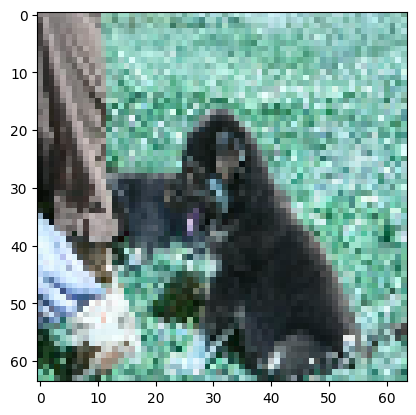

In [20]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [21]:
X_train[0].shape

(64, 64, 3)

In [22]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [26]:
model = Sequential()
model.add(Flatten(input_shape=(64, 64, 3)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [27]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)


Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.5317 - loss: 0.7498 - val_accuracy: 0.5650 - val_loss: 0.6764
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.5807 - loss: 0.6766 - val_accuracy: 0.6053 - val_loss: 0.6599
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.6101 - loss: 0.6587 - val_accuracy: 0.5715 - val_loss: 0.6911
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.6032 - loss: 0.6590 - val_accuracy: 0.5635 - val_loss: 0.6797
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.6107 - loss: 0.6535 - val_accuracy: 0.6085 - val_loss: 0.6538


In [28]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.2f}")


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6048 - loss: 0.6513
Test Accuracy: 0.61


In [31]:
import cv2
import numpy as np

def predict_image(model, image_path, image_size=64):
    # Load and preprocess the image
    img = cv2.imread(image_path)

    if img is None:
        print("❌ Error: Image not found or unreadable.")
        return None

    img = cv2.resize(img, (image_size, image_size))
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension: (1, 64, 64, 3)

    # Predict
    prediction = model.predict(img)[0][0]

    # Interpret result
    label = "Dog 🐶" if prediction >= 0.5 else "Cat 🐱"
    confidence = prediction if prediction >= 0.5 else 1 - prediction

    print(f"Prediction: {label} (Confidence: {confidence*100:.2f}%)")
    return label


In [33]:
predict_image(model, '/content/dog.jpeg', image_size=64)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Prediction: Dog 🐶 (Confidence: 66.64%)


'Dog 🐶'